In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from paos.paos_parseconfig import parse_config
from paos.paos_run import run
from paos.paos_plotpop import plot_psf_xsec
import matplotlib.pyplot as plt

In [3]:
pup_diameter, parameters, wavelengths, fields, opt_chains = parse_config('../lens data/Ariel_AIRS-CH1.ini')
wl_idx = 0  # choose the first wavelength
wavelength, opt_chain = wavelengths[wl_idx], opt_chains[wl_idx]
ret_val = run(pup_diameter, 1.0e-6 * wavelength, parameters['grid_size'], parameters['zoom'],
              fields[0], opt_chain)
key = list(ret_val.keys())[-1]  # plot at last optical surface
print(parameters)

{'project': 'Ariel AIRS CH1', 'version': '1.0', 'grid_size': 512, 'zoom': 4, 'Tambient': -223.0, 'Pambient': 0.0}


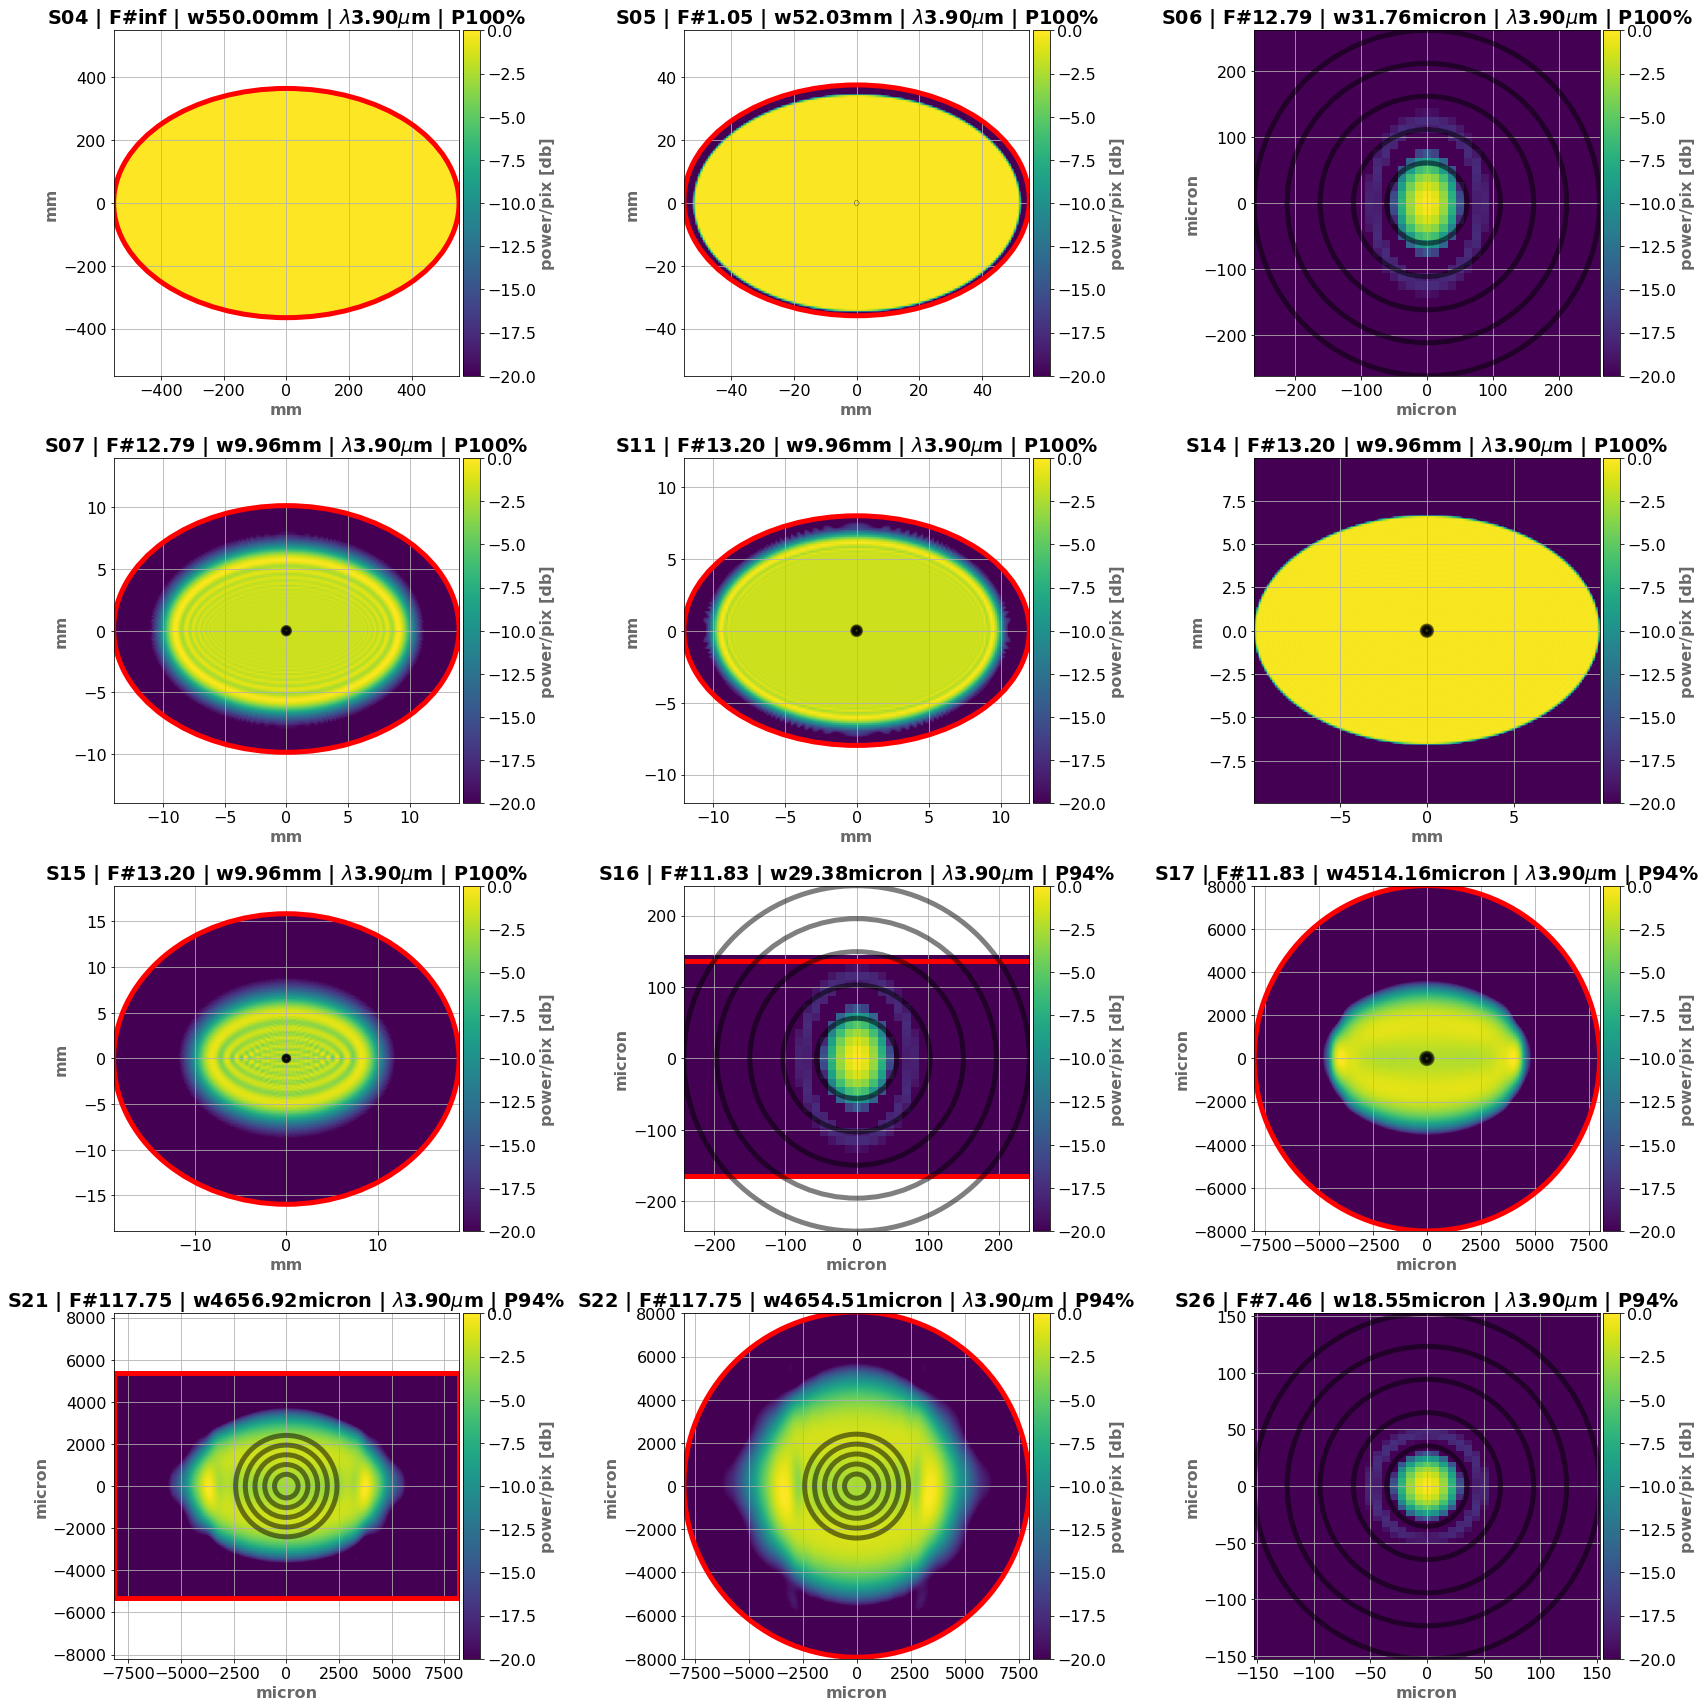

In [4]:
from paos.paos_plotpop import plot_pop
plot_pop(ret_val, ima_scale='log', ncols=3)

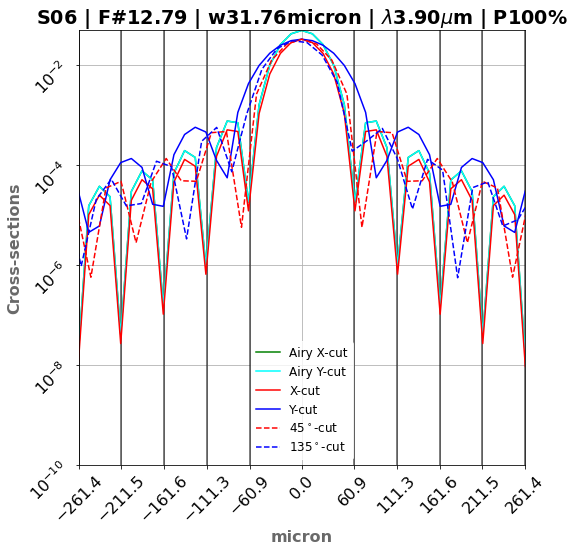

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
plot_psf_xsec(fig=fig, axis=ax, key=6, item=ret_val[6], ima_scale='log')

In [6]:
from astropy.io import ascii
wfe = ascii.read('../wfe data/wfe_template.csv')

pup_diameter, parameters, wavelengths, fields, opt_chains = parse_config('../lens data/lens_file_TA_Ground.ini')
field, wavelength, opt_chain = fields[0], wavelengths[0], opt_chains[0]

In [10]:
import os, sys
from astropy.io import ascii

paospath = "~/git/PAOS"

wfe_folder = os.path.join(os.path.expanduser(paospath), 'wfe data')
wfe = ascii.read(os.path.join(wfe_folder, 'wfe_realization_SN20210914.csv'))

df = wfe.to_pandas()

TypeError: '(slice(None, None, None), 110)' is an invalid key

In [7]:
Nsims = len(wfe.columns) - 3
n_jobs = 2
Nsurf = 14

import copy
import numpy as np
optc = []
for k in range(Nsims):
    temp = copy.deepcopy(opt_chain)
    Ck = wfe['col%i'%(k+4)].data * 1e-9
    temp[Nsurf]['Z'] = np.append(np.zeros(3), Ck)
    optc.append(temp)

In [8]:
opt_chain[Nsurf]

{'num': 14,
 'type': 'Zernike',
 'R': nan,
 'T': nan,
 'material': '',
 'is_stop': False,
 'save': True,
 'name': 'Z1',
 'Zordering': 'standard',
 'Znormalize': False,
 'Zradius': 0.01,
 'Zorigin': 'x',
 'Zindex': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 'Z': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.73533479e-05,
        -5.15558700e-06,  1.42008729e-07,  6.85934610e-09, -6.04051890e-08,
         7.57330080e-07,  2.44047045e-06, -1.48831071e-06,  1.83374901e-06,
        -1.32930678e-06, -4.34391780e-09, -4.63265880e-09,  1.32420894e-09,
         1.11254952e-08, -5.88664440e-09, -2.09641296e-07,  2.73992973e-08,
        -5.94661620e-07,  4.28301720e-07, -6.88748160e-07,  1.34982600e-06,
        -6.85160520e-07, -2.87440347e-10, -9.68890200e-10,  2.77608849e-09,
        -2.73036219e-09, -1.13148786e-09,  3.85286010e-09, -1.77805419e-09,
    

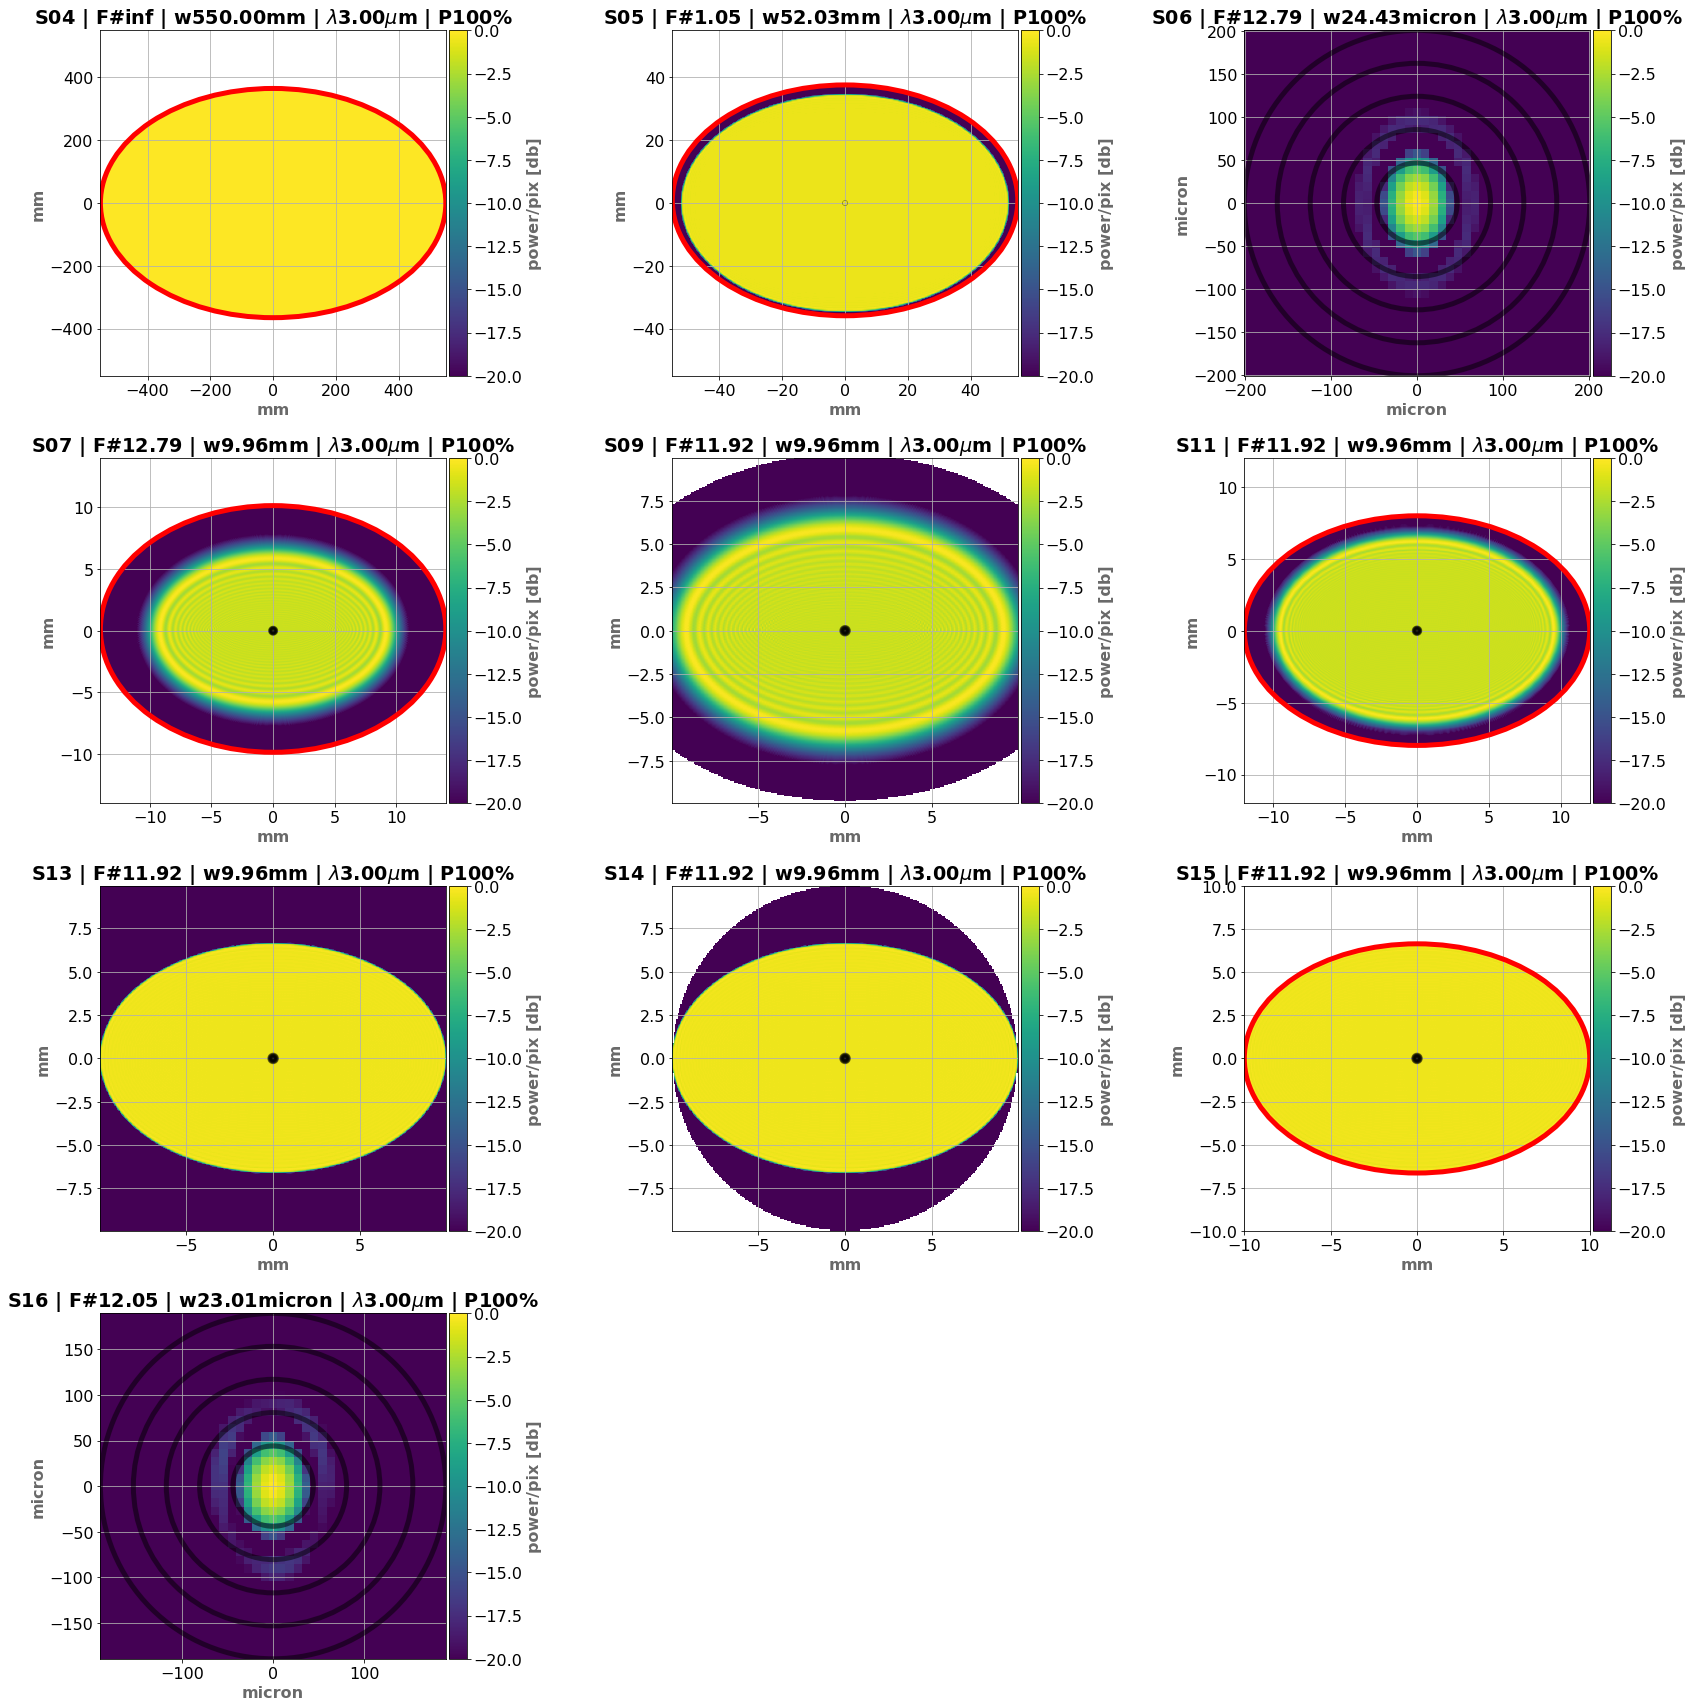

In [9]:
ret_val = run(pup_diameter, 1.0e-6 * wavelength, parameters['grid_size'], parameters['zoom'],
              fields[0], optc[0])
key = list(ret_val.keys())[-1]  # plot at last optical surface
from paos.paos_plotpop import plot_pop

plot_pop(ret_val, ima_scale='log', ncols=3)

In [10]:
from paos.paos_parseconfig import parse_config
from paos.paos_raytrace import raytrace
# pup_diameter, parameters, wavelengths, fields, opt_chains = parse_config('path/to/conf/file')
pup_diameter, parameters, wavelengths, fields, opt_chains = parse_config('../lens data/Ariel_AIRS-CH1.ini')
raytrace(fields[0], opt_chains[0])

['S02 - LOS tilt        y:  0.000mm ut: 1.745e-03 rad x:  0.000mm us: 0.000e+00 rad',
 'S03 - Move to M1      y:500.000mm ut: 1.745e-03 rad x:  0.000mm us: 0.000e+00 rad',
 'S04 - M1              y: 49.136mm ut: 4.294e-01 rad x:  0.000mm us: 0.000e+00 rad',
 'S05 - M2              y: 24.559mm ut:-1.846e-02 rad x:  0.000mm us: 0.000e+00 rad',
 'S06 - FOCUS           y: 19.855mm ut:-1.846e-02 rad x:  0.000mm us: 0.000e+00 rad',
 'S07 - M3              y: 19.855mm ut: 9.637e-02 rad x:  0.000mm us: 0.000e+00 rad',
 'S08 - Ray Centering   y: -0.018mm ut:-6.050e-05 rad x:  0.000mm us: 0.000e+00 rad',
 'S09 - Move to M4      y: -0.006mm ut:-6.050e-05 rad x:  0.000mm us: 0.000e+00 rad',
 'S10 - x tilt - M4     y: -0.009mm ut:-1.124e+00 rad x:  0.000mm us: 0.000e+00 rad',
 'S11 - M4              y: -0.009mm ut: 1.124e+00 rad x:  0.000mm us: 0.000e+00 rad',
 'S12 - x tilt - M4     y:  0.000mm ut: 6.050e-05 rad x:  0.000mm us: 0.000e+00 rad',
 'S14 - exit pupil      y:  0.064mm ut: 6.050e-05 rad 

In [11]:
from paos.paos_abcd import ABCD
thickness = 50.0  # mm
abcd = ABCD(thickness=thickness)
print(abcd.ABCD)

[[ 1. 50.]
 [ 0.  1.]]


In [12]:
wavelengths

[3.9, 5.85, 7.8]

In [13]:
import numpy as np
from paos.paos_coordinatebreak import coordinate_break

field = {'us': 0.0, 'ut': 0.0}
vt = np.array([0.0, field['ut']])
vs = np.array([0.0, field['us']])

print(vs, vt)

xdec, ydec = 0.0, 10.0e-3  # m
xrot, yrot, zrot = 0.1, 0.0, 0.0  # deg
vt, vs = coordinate_break(vt, vs, xdec, ydec, xrot, yrot, zrot, order=0.0)

print(vs, vt)

[0. 0.] [0. 0.]
[0. 0.] [-0.01000002  0.00174533]


In [14]:
from paos.paos_wfo import WFO

beam_diameter = 1.0  # m
wavelength = 3.0  # micron
grid_size = 512
zoom = 4

wfo = WFO(beam_diameter, wavelength, grid_size, zoom)
Ms, Mt = 1.0, 2.0
wfo.Magnification(Ms, Mt)

print(wfo.wz)

paos - WARNING - Gaussian beam magnification is implemented, but has not been tested.


1.0


In [15]:
from paos.paos_wfo import WFO

wfo = WFO(beam_diameter, wavelength, grid_size, zoom)
print(f'Initial beam position, beam semi diameter: {wfo.z, wfo.wz}')

thickness = 10.0e-3  # m
wfo.propagate(dz = thickness)
print(f'Final beam position, beam semi diameter: ({wfo.z}, {wfo.wz:.6f})')

Initial beam position, beam semi diameter: (0.0, 0.5)
Final beam position, beam semi diameter: (0.01, 0.500365)


In [16]:
from paos.paos_wfo import WFO

a = 0.55
b = 0.365
xdec = ydec = 0.0

field = {'us': 0.0, 'ut': 0.1}
vt = np.array([0.0, field['ut']])
vs = np.array([0.0, field['us']])

a *= np.sqrt(1 / (vs[1] ** 2 + 1))
b *= np.sqrt(1 / (vt[1] ** 2 + 1))
x_aper = xdec - vs[0]
y_aper = ydec - vt[0]

wfo = WFO(beam_diameter, wavelength, grid_size, zoom)

aperture_shape = 'elliptical'  # or 'rectangular'
obscuration = False  # if True, applies obscuration

aperture = wfo.aperture(x_aper, y_aper, hx=a, hy=b,
                        shape=aperture_shape, obscuration=obscuration)

print(aperture)

Aperture: EllipticalAperture
positions: [256., 256.]
a: 70.4
b: 46.48813752661069
theta: 0.0


In [17]:
import numpy as np
from paos.paos_wfo import WFO

wfo = WFO(beam_diameter, wavelength, grid_size, zoom)
print(np.sum(wfo.amplitude**2))

wfo.make_stop()
print(np.sum(wfo.amplitude**2))

262144.0
1.0


In [18]:
from paos.paos_abcd import ABCD
radius = 20.0  # mm
abcd = ABCD(curvature=1.0/radius)
(A, B), (C, D) = abcd.ABCD
A, B, C, D

(1.0, 0.0, -0.05, 1.0)

In [19]:
from paos.paos_abcd import ABCD
n1, n2 = 1.0, 1.5
abcd = ABCD(n1 = n1, n2 = n2)
(A, B), (C, D) = abcd.ABCD
A, B, C, D

(1.0, 0.0, 0.0, 0.6666666666666666)

In [20]:
import numpy as np
from paos.paos_abcd import ABCD

radius1, radius2 = np.inf, -20.0  # mm
n_os, n_l, n_is = 1.0, 1.5, 1.0
center_thickness = 5.0
abcd = ABCD(curvature = 1.0/radius1, n1 = n_os, n2 = n_l)
abcd = ABCD(thickness = center_thickness) * abcd
abcd = ABCD(curvature = 1.0/radius2, n1 = n_l, n2 = n_is) * abcd
(A, B), (C, D) = abcd.ABCD
abcd.f_eff

40.0

In [21]:
import os, sys
paospath = "~/git/PAOS"
if not os.path.expanduser(paospath) in sys.path:
    sys.path.append( os.path.expanduser(paospath) )

import paos

from paos import log
log.disableLogging()
log.enableLogging()

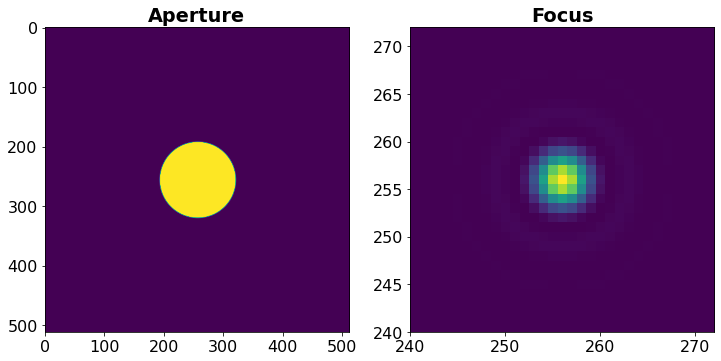

In [22]:
import paos
import matplotlib.pyplot as plt

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
wfo = paos.WFO(beam_diameter, wavelength, grid_size, zoom)

wfo.aperture(xc=xdec, yc=ydec, r=beam_diameter/2, shape='circular')
wfo.make_stop()
ax0.imshow(wfo.amplitude**2)
ax0.set_title('Aperture')

fl = 1.0  # m
thickness = 1.0

wfo.lens(lens_fl=fl)
wfo.propagate(dz=thickness)
ax1.imshow(wfo.amplitude**2)
ax1.set_title('Focus')

zoomin = 16
shapex, shapey = wfo.amplitude.shape
ax1.set_xlim(shapex // 2 - shapex // 2 // zoomin, shapex // 2 + shapex // 2 // zoomin)
ax1.set_ylim(shapey // 2 - shapey // 2 // zoomin, shapey // 2 + shapey // 2 // zoomin)

plt.show()

In [23]:

import os, sys
paospath = "~/git/PAOS"
if not os.path.expanduser(paospath) in sys.path:
    sys.path.append( os.path.expanduser(paospath) )

import paos

import numpy as np
import matplotlib.pyplot as plt
import IPython
%matplotlib notebook
from ipywidgets import *

from paos.util.material import Material

wl = np.linspace(0.5, 8.0, 100)
mat = Material(wl=wl)

glass = 'BK7'

material = mat.materials[glass]
sellmeier = mat.sellmeier(material['sellmeier'])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title(f'{glass} refractive index')
ax.set_ylabel('Sellmeier')
ax.set_xlabel(r'Wavelength [$\mu$m]')
sell, = ax.plot(wl, sellmeier)
plt.grid()
plt.show()

def plot_sellmeier(glass='BK7'):
    material = mat.materials[glass]
    sellmeier = mat.sellmeier(material['sellmeier'])

    ax.set_title(f'{glass} refractive index')
    sell.set_ydata(sellmeier)

    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw_idle()

interact(plot_sellmeier, glass=mat.materials.keys());

<IPython.core.display.Javascript object>

interactive(children=(Dropdown(description='glass', index=3, options=('CAF2', 'SAPPHIRE', 'ZNSE', 'BK7', 'SF11…

In [24]:
from paos.util.material import Material

wl = 1.95  # micron
Tref, Tambient = 20.0, -223.0
mat = Material(wl, Tambient=Tambient)
glass = 'BK7'
nmat0, nmat = mat.nmat(glass)

from IPython.display import display, Latex
display(Latex("Index of refraction in vacuum at $T_{ref}$ = %0.1f: \n$n_{%s, 0}$ = %0.6f " % (Tref, glass, nmat0)))
display(Latex("Index of refraction in vacuum at $T_{amb}$ = %0.1f: \n$n_{%s, 0}$ = %0.6f " % (Tambient, glass, nmat)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [25]:
from paos.paos_pipeline import pipeline

pipeline(passvalue={'conf':'../lens data/Ariel_AIRS-CH1.ini',
                    'output': '../output/prova.h5',
                    'wavelengths': '1.95,3.9',
                    'plot': True,
                    'loglevel': 'info',
                    'n_jobs': 2,
                    'store_keys': 'amplitude,dx,dy,wl',
                    'return': False})

paos - INFO - Parse lens file
paos - INFO - Set up the POP
paos - INFO - Run the POP
paos - INFO - Start POP in parallel...
100%|██████████| 2/2 [00:00<00:00, 33.61it/s]
paos - INFO - POP completed in    4.2s
paos - INFO - Save POP simulation output .h5 file to ../output/prova.h5
paos - INFO - Saving ../output/prova.h5 started...
paos - INFO - Remove old file
paos - INFO - Saving ended.
paos - INFO - Save POP simulation output plot
100%|██████████| 2/2 [00:00<00:00, 929.07it/s]
paos - INFO - Plotting completed in    5.8s


In [29]:
from paos.paos_parseconfig import parse_config
from paos.paos_run import run

pup_diameter, parameters, wavelengths, fields, opt_chains = parse_config('../lens data/Ariel_AIRS-CH1.ini')
ret_val = run(pup_diameter, 1.0e-6 * wavelengths[0], parameters['grid_size'], parameters['zoom'], fields[0], opt_chains[0])

from paos.paos_saveoutput import save_output
save_output(ret_val, '../output/prova.h5', keys_to_keep=['wfo', 'dx', 'dy'], overwrite=True)

paos - INFO - saving ../output/prova.h5 started...
paos - INFO - removing old file
paos - INFO - saving ended.


In [31]:
from paos.paos_saveoutput import save_datacube
from joblib import Parallel, delayed
from tqdm import tqdm

wavelengths = [1.95, 3.9]
ret_val_list = Parallel(n_jobs=2)(delayed(run)(pup_diameter,
                                               1.0e-6 * wavelength,
                                               parameters['grid_size'],
                                               parameters['zoom'],
                                               fields[0],
                                               opt_chain)
                                  for wavelength, opt_chain in tqdm(zip(wavelengths, opt_chains)))

group_tags = list(map(str, wavelengths))
save_datacube(retval_list=ret_val_list,
              file_name='../output/test.h5',
              group_names=group_tags,
              keys_to_keep=['amplitude', 'dx', 'dy'],
              overwrite=True)


2it [00:00, 46.10it/s]
paos - INFO - Saving ../output/test.h5 started...
paos - INFO - Remove old file
paos - INFO - Saving ended.
